In [146]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

In [147]:
# 1. Load dataset. 

df = pd.read_csv("adult_data.csv")

In [148]:
# 2. Exploratory data analysis.

display(df.head())  
display(df.info())  
display(df.describe()) 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex_selfID      32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income_binary   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
# 3. Feature engineering + Data preparation.

# Determine which categorical variables need to be encoded/included.
to_encode = df.select_dtypes(include='object').columns.to_list()
print("\nNumber of unique values per object type: ")
print(df[to_encode].nunique())

# Drop features that contain too many unique values / do not have effect on income. 
df.drop(['native-country', 'fnlwgt', 'capital-loss', 'education'], axis=1, inplace=True)
df = pd.get_dummies(df, columns = ['marital-status', 'occupation', 'race', 'sex_selfID', 'relationship', 'income_binary', 'workclass'], drop_first=True)

# Find any null values.
missing_values = df.isna().sum()
print("\nNumber of null values per feature: ")
print (missing_values)

# Look at class imbalance. 
total = df['income_binary_ >50K'].sum()
print ("\nClass Imbalance ratio: ", total / df.shape[0])

print()
display (df.head())


Number of unique values per object type: 
workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex_selfID         2
native-country    42
income_binary      2
dtype: int64



Number of null values per feature: 
age                                      0
education-num                            0
capital-gain                             0
hours-per-week                           0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
occupation_ Adm-clerical                 0
occupation_ Armed-Forces                 0
occupation_ Craft-repair                 0
occupation_ Exec-managerial              0
occupation_ Farming-fishing              0
occupation_ Handlers-cleaners            0
occupation_ Machine-op-inspct            0
occupation_ Other-service                0
occupation_ Priv-house-serv              0
occupation_ Prof-specialty               0
occupation_ Protective-serv              0
occupation_ Sales                        0
occupation_ Tech-

,age,education-num,capital-gain,hours-per-week,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,...,relationship_ Wife,income_binary_ >50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,13,2174,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,40,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,13,0,40,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [150]:
# 3. Model selection and comparison.

y = df['income_binary_ >50K']
X = df.drop('income_binary_ >50K', axis = 1)

models = []
scores = []
auc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1234)

In [151]:
# Decision Tree Model

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

models.append("DT")
scores.append(grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.851141173521413


In [152]:
dt_model = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                    max_depth = grid_search.best_params_['max_depth'],
                                    min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'])
dt_model.fit(X_train, y_train)
dt_model_probs = dt_model.predict_proba(X_test)[:, 1]
dt_model_auc = roc_auc_score(y_test, dt_model_probs)

print("Decision Tree AUC:", dt_model_auc)
auc.append(dt_model_auc)


Decision Tree AUC: 0.8836289125486794


In [153]:
# KNN Classifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

models.append("KNN")
scores.append(grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7}
Best Accuracy: 0.8418968856843108


In [154]:
knn_model = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)
knn_model_probs = knn_model.predict_proba(X_test)[:, 1]
knn_model_auc = roc_auc_score(y_test, knn_model_probs)

print("KNN AUC:", knn_model_auc)
auc.append(knn_model_auc)

KNN AUC: 0.8658612409553691


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 150}
Best Accuracy: 0.8598631031265762


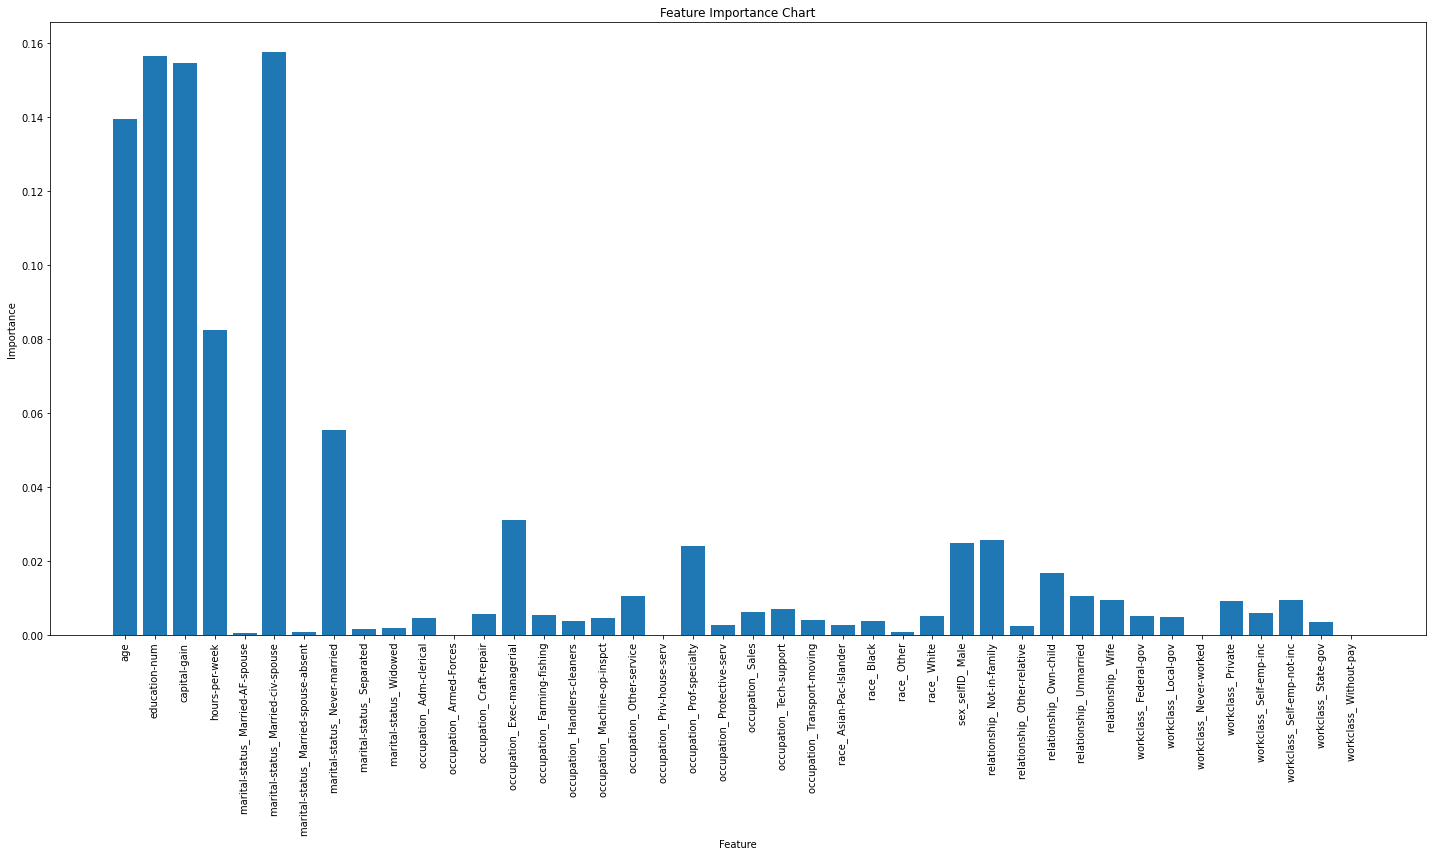

In [155]:
# Random Forest Classifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

models.append("RF")
scores.append(grid_search.best_score_)

# Visualize feature importance.
rf_classifier = RandomForestClassifier(max_depth = 30, min_samples_leaf = 2, n_estimators = 100)
rf_classifier.fit(X_train, y_train)
feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(20, 12))
plt.bar(range(len(feature_importance)), feature_importance, tick_label = X.columns.tolist())
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Chart')
plt.tight_layout()
plt.show()

In [156]:
RF_model = RandomForestClassifier(max_depth = grid_search.best_params_['max_depth'], 
                                    min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                                    n_estimators = grid_search.best_params_['n_estimators'])
RF_model.fit(X_train, y_train)
RF_model_probs = RF_model.predict_proba(X_test)[:, 1]
RF_model_auc = roc_auc_score(y_test, RF_model_probs)

print("RF AUC:", RF_model_auc)
auc.append(RF_model_auc)

RF AUC: 0.9035564099728152


In [157]:
# Logistic regression.

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

logreg = LogisticRegression(max_iter=1000, solver = 'liblinear')
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

models.append("LR")
scores.append(score)

Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Accuracy: 0.8510002299334907


In [158]:
LR_model = LogisticRegression(C = grid_search.best_params_['C'], 
                                penalty = grid_search.best_params_['penalty'], 
                                solver = 'liblinear')
LR_model.fit(X_train, y_train)
LR_model_probs = LR_model.predict_proba(X_test)[:, 1]
LR_model_auc = roc_auc_score(y_test, LR_model_probs)

print("LR AUC:", LR_model_auc)
auc.append(LR_model_auc)

LR AUC: 0.889734496789629


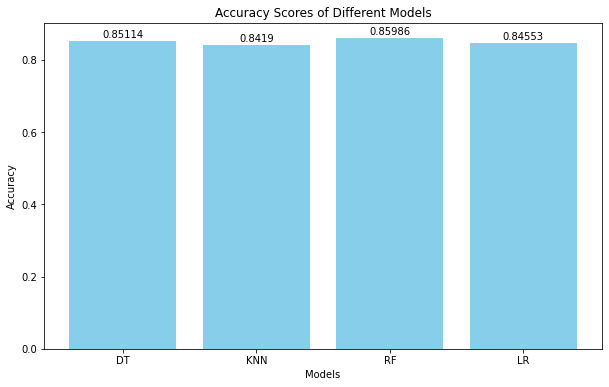

In [159]:
# Visualize accuracies of models. 

plt.figure(figsize=(10, 6))
truncated_score_array = np.around(scores, decimals=5)
plt.bar(models, scores, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')

for i, v in enumerate(truncated_score_array):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')

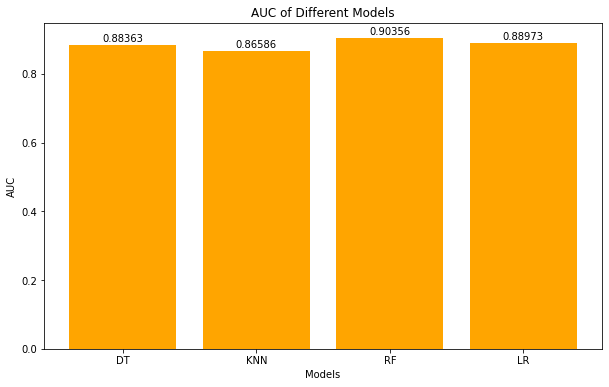

In [160]:
# Visualize AUC of models. 

plt.figure(figsize=(10, 6))
truncated_auc_array = np.around(auc, decimals=5)
plt.bar(models, auc, color='orange')

plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC of Different Models')

for i, v in enumerate(truncated_auc_array):
    plt.text(i, v + 0.01, str(v), color='black', ha='center')

In [161]:
# 4. Model tuning. 
# From the above graphs, we can see that the Random Forest classifier performed best with the highest accuracy score and AUC. 

RF_model_1 = RandomForestClassifier(max_depth = 30, min_samples_leaf = 2, n_estimators = 100)
RF_model_1.fit(X_train, y_train)

feature_importances = RF_model_1.feature_importances_

# Use feature selection to see if we can improve the RF model accuracy. 
threshold = 0.002
selected_indices = np.where(feature_importances > threshold)[0]
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

RF_classifier_selected = RandomForestClassifier(max_depth = 30, min_samples_leaf = 2, n_estimators = 100)
RF_classifier_selected.fit(X_train_selected, y_train)

accuracy_selected = RF_classifier_selected.score(X_test_selected, y_test)
print("Accuracy with selected features:", accuracy_selected)

# Interestingly, even after playing around with the threshold for feature importance and eliminating the least importance features,
# the accuracy remained highest when using the same number features as before.

Accuracy with selected features: 0.8508547446002661


In [165]:
# In conclusion, the strongest model for predicting whether income will be above or below 50k is the following:

display(RF_model)
print("Accuracy: ", scores[2])
print("AUC: ", auc[2])

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=150)

Accuracy:  0.8598631031265762
AUC:  0.9035564099728152
